##  Linear regression - Boston housing prices

1. Title: Boston Housing Data

2. Relevant Information:
   Concerns housing values in suburbs of Boston.

3. Number of Instances: 506

4. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

5. Attribute Information:
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per USD 1000  
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks y town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in USD 1000's
6. Missing Attribute Values:  None.


16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.

In [2]:
import os
import math
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

% matplotlib inline 

In [3]:
load_app_config()
DIRECTORY="boston"
FILENAME ='housing.csv'
PREDICTOR="MEDV"
input_path = get_datafolder_path()

{'DEV': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'PRD': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'REG': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'UAT': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}}
Adding F:\MachineLearning  to system path
Adding F:\DataSource  to system path


In [53]:
def start_regression(filename=FILENAME,predictor=PREDICTOR):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = load_data(input_file)
    print(" input file is :{0} loaded.".format(input_file))
    #print(input_dataset.head())
    
    try:
        continuous_vars = input_dataset.describe().columns
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
    
    predictor_column =  [col for col in input_dataset.columns if predictor in col]
    feature_columns =  [col for col in input_dataset.columns if predictor not in col]
    
    print(predictor_column)
    print(feature_columns)
    
    
    cleaned_input = input_dataset.dropna(axis=0)
    #cleaned_input = cleaned_input.loc[cleaned_input[predictor]!= 50.0]
    
    # Check only effect LSTAT - % lower status of the population 
    y = cleaned_input[predictor_column]
    X = cleaned_input['LSTAT']
    
    print(cleaned_input.info())
    
    # import model
    from sklearn.linear_model import LinearRegression

    # instantiate
    linreg = LinearRegression()

    # fit the model to the training data (learn the coefficients)
    linreg.fit(X.values.reshape(-1, 1), y)
    
    print("Linear Intercept :{0}".format(linreg.intercept_))
    print("Linear Intercept :{0}".format(linreg.coef_))
    
   
    import seaborn as sns
    sns.set(color_codes=True)
    ax = sns.regplot(x="LSTAT", y="MEDV", data=cleaned_input)
    plt.show()
    
     


 input file is :F:\DataSource\boston\housing.csv loaded.
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
No categorical variables
['MEDV']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 505
Data columns (total 14 columns):
CRIM       452 non-null float64
ZN         452 non-null float64
INDUS      452 non-null float64
CHAS       452 non-null float64
NOX        452 non-null float64
RM         452 non-null float64
AGE        452 non-null float64
DIS        452 non-null float64
RAD        452 non-null int64
TAX        452 non-null float64
PTRATIO    452 non-null float64
B          452 non-null float64
LSTAT      452 non-null float64
MEDV       452 non-null float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB
None
Linear Intercept :[ 35.31253733]
Linear Intercept :[[-1.01050

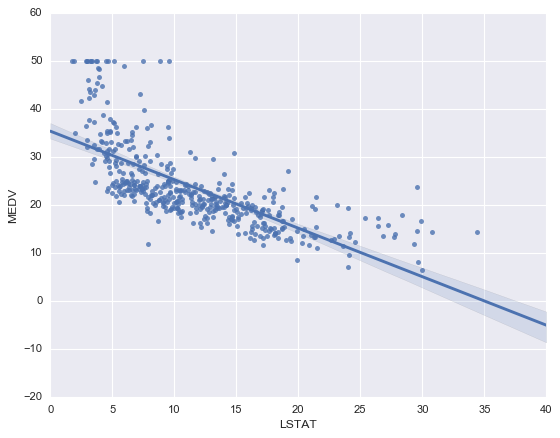

In [54]:
pd.options.display.float_format = '{:,.4f}'.format
start_regression()